### Exercícios PySpark

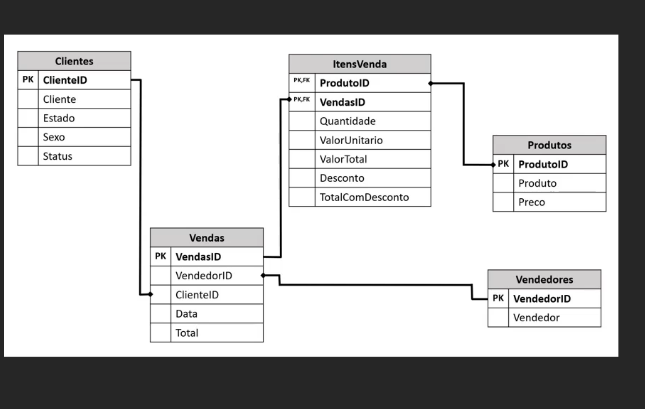

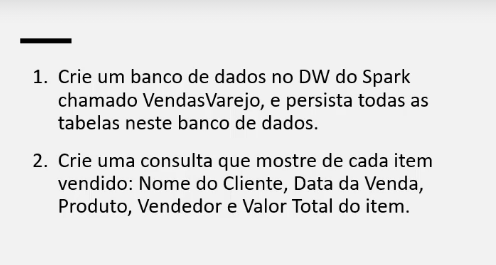

In [1]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 13.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=937b259421e1a8dd256e6a6cea21209685482e60da81ebd083892ffefa36a2b5
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('app_spark').getOrCreate()

In [4]:
clientes = spark.read.format('parquet').load('dados_de_exemplo\Atividades\Clientes.parquet')
itens_venda = spark.read.format('parquet').load('dados_de_exemplo\Atividades\ItensVendas.parquet')
produtos = spark.read.format('parquet').load('dados_de_exemplo\Atividades\Produtos.parquet')
vendas = spark.read.format('parquet').load('dados_de_exemplo\Atividades\Vendas.parquet')
vendedores = spark.read.format('parquet').load('dados_de_exemplo\Atividades\Vendedores.parquet')

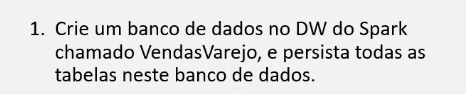

In [ ]:
spark.sql('CREATE DATABASE vendas_varejo')

In [8]:
spark.sql('SHOW DATABASES').show()

+-------------+
|    namespace|
+-------------+
|      default|
|vendas_varejo|
+-------------+



In [9]:
spark.sql('USE DATABASE vendas_varejo').show()

++
||
++
++



In [10]:
clientes.write.saveAsTable('clientes')
itens_venda.write.saveAsTable('itens_venda')
produtos.write.saveAsTable('produtos')
vendas.write.saveAsTable('vendas')
vendedores.write.saveAsTable('vendedores')

In [12]:
spark.sql('SHOW TABLES').show()

+-------------+-----------+-----------+
|    namespace|  tableName|isTemporary|
+-------------+-----------+-----------+
|vendas_varejo|   clientes|      false|
|vendas_varejo|itens_venda|      false|
|vendas_varejo|   produtos|      false|
|vendas_varejo|     vendas|      false|
|vendas_varejo| vendedores|      false|
+-------------+-----------+-----------+



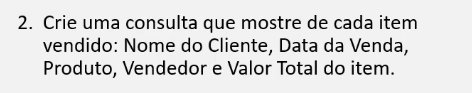

In [34]:
data = spark.sql("""
SELECT 
  cliente AS nm_cliente,
  data AS dt_venda,
  ValorTotal AS vl_total_item,
  vendedor AS nm_vendedor,
  produto AS nm_produto
FROM 
  clientes
INNER JOIN 
  vendas
ON 
  clientes.clienteID = vendas.clienteID
INNER JOIN 
  itens_venda
ON 
  itens_venda.vendasID = vendas.vendasID
INNER JOIN 
  vendedores
ON 
  vendas.vendedorID = vendedores.vendedorID
INNER JOIN 
  produtos
ON 
  produtos.produtoID = itens_venda.produtoID
""")

In [35]:
data.show()

+--------------------+----------+-------------+----------------+--------------------+
|          nm_cliente|  dt_venda|vl_total_item|     nm_vendedor|          nm_produto|
+--------------------+----------+-------------+----------------+--------------------+
|Adelina Buenaventura|13/12/2019|       114.75|Jéssica Castelão|Camiseta Predacto...|
|Adelina Buenaventura|13/12/2019|        103.5|Jéssica Castelão|Bermuda Predactor...|
|Adelina Buenaventura|13/12/2019|      2268.99|Jéssica Castelão|Bicicleta Gometws...|
|Adelina Buenaventura|13/12/2019|       6892.2|Jéssica Castelão|Bicicleta Trinc C...|
|        Adelino Gago| 22/8/2020|       118.58|   Daniel Pirajá|Capacete Gometws ...|
|        Adelino Gago| 22/8/2020|        188.0|   Daniel Pirajá|Luva De Ciclismo ...|
|        Adelino Gago| 22/8/2020|       2521.1|   Daniel Pirajá|Bicicleta Gometws...|
|        Adelino Gago| 22/8/2020|       2955.0|   Daniel Pirajá|Bicicleta Gometws...|
|     Adolfo Patrício| 7/11/2020|        139.5|  Hélio

In [36]:
data.show(data.count(), truncate=False)

+------------------------------+----------+-------------+----------------+--------------------------------------------------------------------------------+
|nm_cliente                    |dt_venda  |vl_total_item|nm_vendedor     |nm_produto                                                                      |
+------------------------------+----------+-------------+----------------+--------------------------------------------------------------------------------+
|Adelina Buenaventura          |13/12/2019|114.75       |Jéssica Castelão|Camiseta Predactor 3Xu Multiplied                                               |
|Adelina Buenaventura          |13/12/2019|103.5        |Jéssica Castelão|Bermuda Predactor 3Xu Pro                                                       |
|Adelina Buenaventura          |13/12/2019|2268.99      |Jéssica Castelão|Bicicleta Gometws Endorphine 7.3 - Shimano Alumínio Aro 29 - 24 Marchas         |
|Adelina Buenaventura          |13/12/2019|6892.2       |Jéssica